# Sample quality control

In [1]:
from pylluminator.samples import Samples, read_samples
from pylluminator.utils import set_logger, load_object
from pylluminator.annotations import Channel, Annotations, ArrayType, GenomeVersion
from pylluminator.utils import set_logger
from pylluminator.quality_control import *

import matplotlib.pyplot as plt
import pandas as pd

set_logger('WARNING')  # set the verbosity level, can be DEBUG, INFO, WARNING, ERROR

## Load pylluminator Samples

We assume that you have already processed the .idat files according to your preferences and saved them. If not, please refer to notebook `1 - Read data and get beta values` before going any further.

In [2]:
my_samples = Samples.load('preprocessed_samples')
my_samples

Samples object with 6 samples: LNCAP_500_3, PREC_500_2, LNCAP_500_1, LNCAP_500_2, PREC_500_3, PREC_500_1
EPICv2 array - genome version hg38
937,688 probes

## Chose a sample and print QCs

In [3]:
sample_name = 'LNCAP_500_3'
detection_stats(my_samples, sample_name)
intensity_stats(my_samples, sample_name)
nb_probes_stats(my_samples, sample_name)
type1_color_channels_stats(my_samples, sample_name)
dye_bias_stats(my_samples, sample_name)
betas_stats(my_samples, sample_name)


|  Detection - mask not applied

N. Probes w/ Missing Raw Intensity                      2
% Probes w/ Missing Raw Intensity                       0.00 %
N. Probes w/ Detection Success                          868,970
% Detection Success                                     92.67 %

N. cg probes                                            933,252
N. Probes w/ Detection Success cg                       865,590
% Detection Success cg                                  92.75 %

N. ch probes                                            2,914
N. Probes w/ Detection Success ch                       2,556
% Detection Success ch                                  87.71 %

N. snp probes                                           65
N. Probes w/ Detection Success snp                      65
% Detection Success snp                                 100.00 %

|  Signal intensity - mask not applied

Mean in-band signal intensity                           2493.53
Mean in-band signal intensity (M+U)           

## Plot the number of beads per probe

This will work only if you have kept the .idat data when reading the samples (parameter `keep_idat=True`)

<BarContainer object of 60 artists>

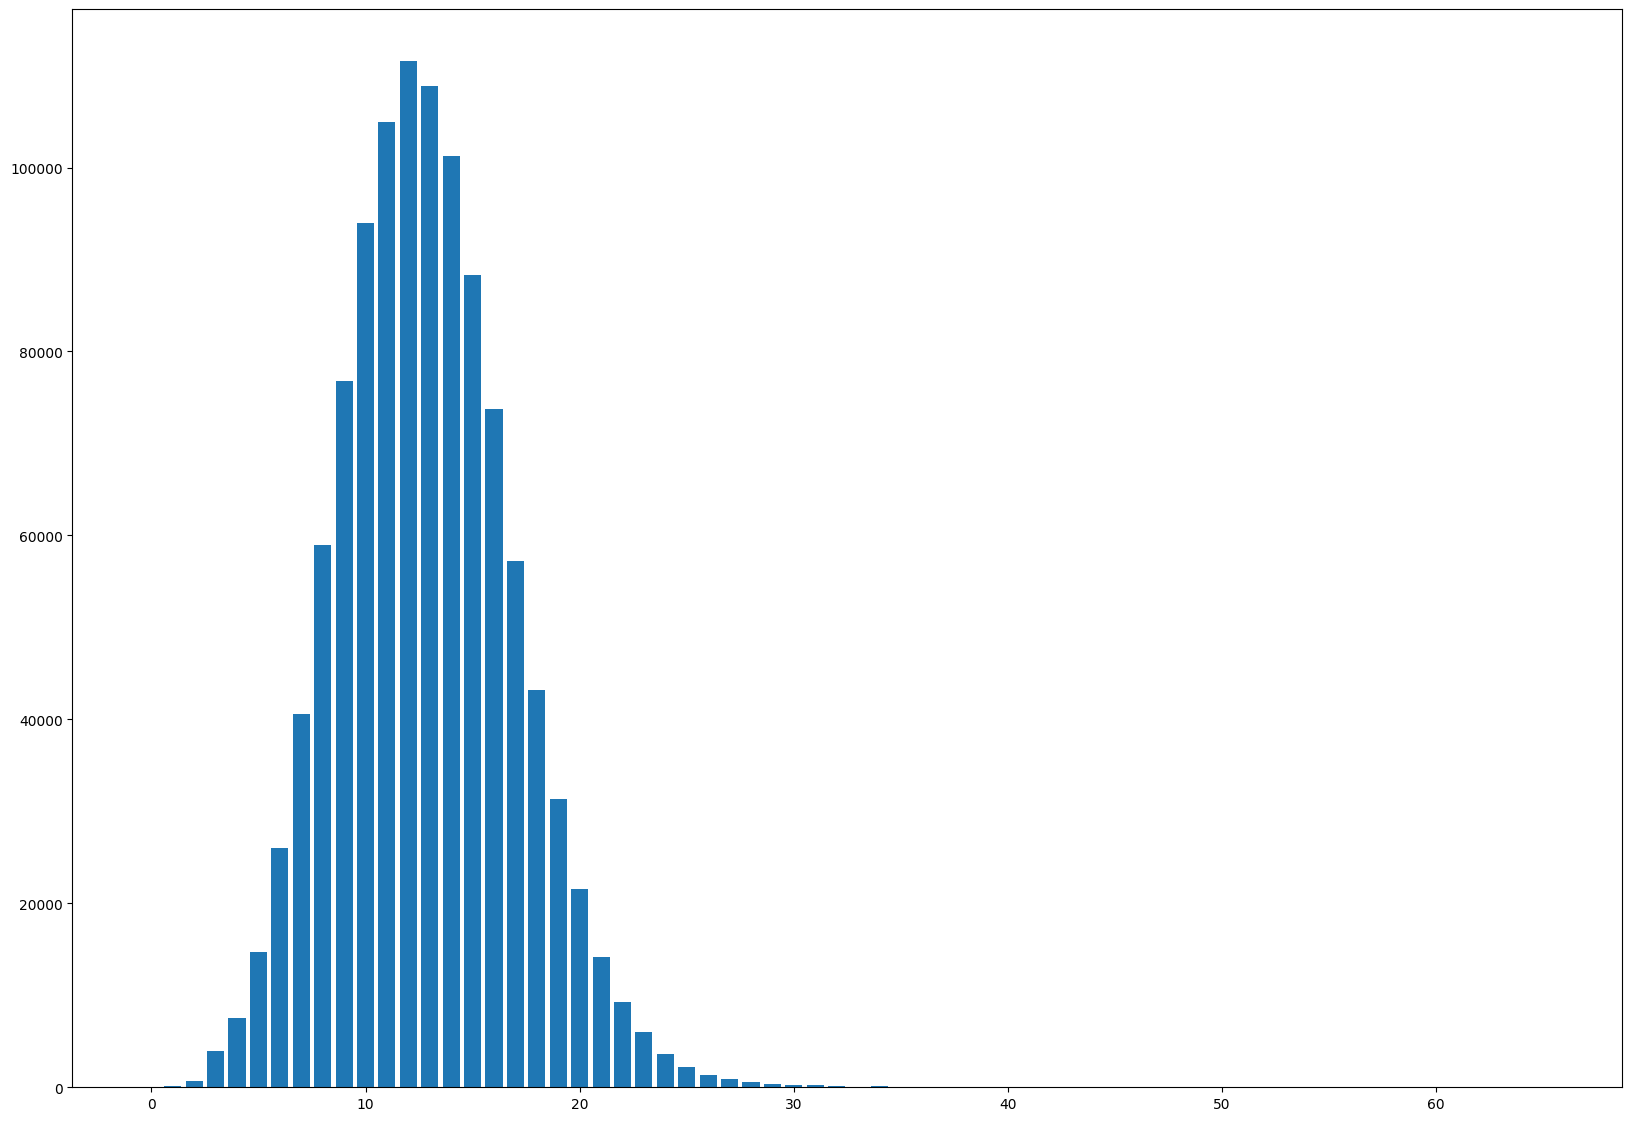

In [4]:
count_beads = my_samples.idata[sample_name][Channel.RED].groupby('n_beads').count()

# don't display the (very) long tail of the graph, stop at the last bin that contains at least 5 probes
five_probes_min = count_beads[count_beads.mean_value > 5]
max_more_than_five_probe = five_probes_min.index.max()

# plot
plt.figure(figsize=(20, 14))
plt.bar(five_probes_min.index, five_probes_min['std_dev'])